In [367]:
from GML import sweetviz

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

In [2]:
%matplotlib inline

In [198]:
train = pd.read_csv('train.csv')

In [199]:
train.drop(columns=['yyyy', 'PerNo'], inplace=True)

In [200]:
train = train.dropna().reset_index(drop=True)

target = train.PerStatus.copy()
train = train.drop(columns= ['PerStatus'])

# Transform Columns of Class label type to One Hot Encoding Type

In [201]:
one_hot_columns = ['sex', '工作分類', '職等', '廠區代碼', '管理層級', '當前專案角色', 
                   '工作地點', '婚姻狀況', '最高學歷', '畢業學校類別', '畢業科系類別', '歸屬部門']

In [202]:
for one_hot_col in one_hot_columns:
    onehotencoder = OneHotEncoder()
    data_whole_ohe = onehotencoder.fit_transform(train[one_hot_col].values.reshape(-1, 1)).toarray()
    categories = sorted(train[one_hot_col].value_counts().index)
    
    cate_tmp = []
    for cate in categories:
        cate_tmp.append(one_hot_col + '_' + str(int(cate)))
    new_df = pd.DataFrame(data_whole_ohe, columns=cate_tmp)
    train = pd.concat([train, new_df], axis=1)

train.drop(columns=one_hot_columns, inplace= True)

In [364]:
train

,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,特殊專案佔比,訓練時數A,訓練時數B,...,廠區代碼_12,歸屬部門_19099,畢業學校類別_6,歸屬部門_12072,工作地點_10,歸屬部門_12115,歸屬部門_12023,歸屬部門_12106,歸屬部門_16143,工作地點_13
0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,1.0,0.0,0.0,23.0,3.0,1.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,23.0,4.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,0.0,0.0,0.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14315,0.0,0.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14316,0.0,0.0,0.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14317,0.0,0.0,0.0,0.0,0.0,23.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# train.to_csv('preprocess_train.csv', index=0, encoding='utf-8-sig')

In [204]:
train.head()

,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,特殊專案佔比,訓練時數A,訓練時數B,...,歸屬部門_20071,歸屬部門_20082,歸屬部門_20089,歸屬部門_20123,歸屬部門_20127,歸屬部門_20130,歸屬部門_20134,歸屬部門_20184,歸屬部門_20192,歸屬部門_20208
0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,23.0,3.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,23.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Test data preprocess**

In [349]:
contest_test_data = pd.read_csv('test.csv')

In [350]:
test_data = contest_test_data.drop(columns=['PerStatus', 'yyyy', 'PerNo'])

In [351]:
test_data = test_data.dropna()

In [352]:
test_data = test_data.reset_index()

In [353]:
for one_hot_col in one_hot_columns:
    onehotencoder = OneHotEncoder()
    data_whole_ohe = onehotencoder.fit_transform(test_data[one_hot_col].values.reshape(-1, 1)).toarray()
    categories = sorted(test_data[one_hot_col].value_counts().index)
    
    cate_tmp = []
    for cate in categories:
        cate_tmp.append(one_hot_col + '_' + str(int(cate)))
    new_df = pd.DataFrame(data_whole_ohe, columns=cate_tmp)
    test_data = pd.concat([test_data, new_df], axis=1)

test_data.drop(columns=one_hot_columns, inplace= True)

In [355]:
for col in list(set(train.columns) - set(test_data.columns)):
    test_data[col] = 0

In [334]:
for col in list(set(test_data.iloc[:, 1:].columns) - set(train.columns)):
    train[col] = 0

In [363]:
test_data[sorted(test_data.columns)].to_csv('test_data.csv', index=0, encoding='utf-8-sig')

# Establish EDA to observe the Data Distribution and Correration

In [94]:
result1 = sweetviz.compare([pd.concat([y_train, X_train], axis=1),'train'], [X_test,'test'],'PerStatus', pairwise_analysis='off') 

                                          |                                                | [  0%]   00:00 ->…

In [365]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [95]:
result1.show_html()

Report GML_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Example of Variables that benefit for our model

![image info](./pictures/專案時數.jpg) ![image info](./pictures/升遷速度.jpg)

Text(0, 0.5, 'Perstatuse')

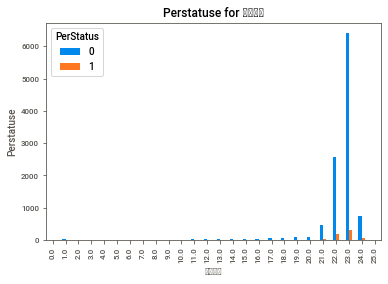

In [119]:
data = X_train.iloc[:, 5]
pd.crosstab(data, y_train).plot(kind='bar')
name = data.name
plt.title('Perstatuse for ' + name)
plt.xlabel(name)
plt.ylabel('Perstatuse')

<AxesSubplot:>

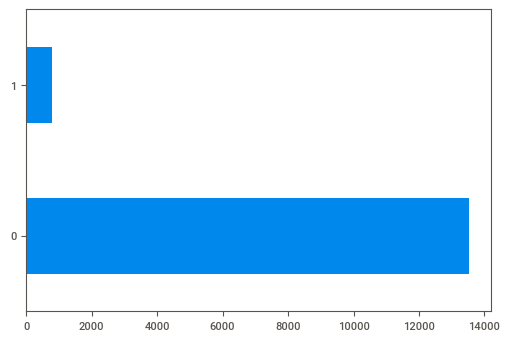

In [32]:
target.value_counts().plot(kind='barh')

## **As we see the target data is imbalance. Therefore, we can use RandomUnderSampler, SMOTE, RandomUnderSampler+SMOTE to deal with this situation**

### Under Sampling

In [18]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

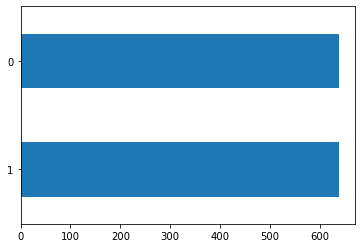

In [33]:
y_train_under.value_counts().plot(kind='barh')

### SMOTE

In [368]:
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

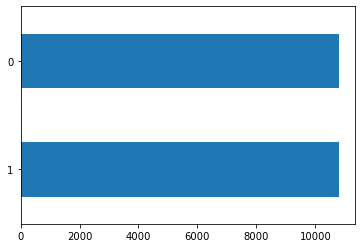

In [382]:
y_train_SMOTE.value_counts().plot(kind='barh')

In [373]:
cols = ['工作資歷1', '工作資歷2', '工作資歷3', '工作資歷4', '工作資歷5', '是否升遷']
cols = cols + X_train_SMOTE.iloc[:, 32:].columns.tolist()

for col in cols:
    for i in range(len(X_train_SMOTE)):
        if X_train_SMOTE[col][i] < 0.5:
            X_train_SMOTE[col][i] = 0.0
        else:
            X_train_SMOTE[col][i] = 1.0

In [379]:
X_train_SMOTE[sorted(X_train_SMOTE.columns)].to_csv('X_train_SMOTE.csv', index=0, encoding= 'utf-8-sig')
y_train_SMOTE.to_csv('y_train_SMOTE.csv', index=0, encoding= 'utf-8-sig')

In [380]:
X_test[sorted(X_train_SMOTE.columns)].to_csv('X_test.csv', index=0, encoding= 'utf-8-sig')
y_test.to_csv('y_test.csv', index=0, encoding= 'utf-8-sig')